In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import json

In [3]:
random.seed(42)

In [62]:
total_graphs = 2000
average_nodes = 20
max_nodes = 50
min_m = 1
max_m = 5
min_label =0
max_label =1000
image_folder="../data/BA_model/plots/"
json_file="../data/BA_model/BA_model_all_graphs"
assert max_label-min_label+1>=max_nodes
change_graph_node_labels=0.6

In [5]:
num_small_graphs = total_graphs // 2
num_large_graphs = total_graphs - num_small_graphs

In [6]:
# Generate large graphs (up to 50 nodes)
large_graphs = []
for _ in range(num_large_graphs):
    num_nodes = random.randint(20, max_nodes)
    m = random.randint(min_m, max_m)
    large_graphs.append(nx.barabasi_albert_graph(num_nodes, m))

# Generate small graphs (4 to 20 nodes)
small_graphs = []
for _ in range(num_small_graphs):
    num_nodes = random.randint(4, 20)
    if num_nodes<=max_m+1:
        m=random.randint(1,3)
    else:
        m = random.randint(min_m,max_m)
    small_graphs.append(nx.barabasi_albert_graph(num_nodes, m))

In [7]:
# Ensure that the average number of nodes is 20
total_nodes = sum([G.number_of_nodes() for G in small_graphs + large_graphs])
scale_factor = total_nodes / (average_nodes * total_graphs)
print("scale by  ",scale_factor)
modified_large_graphs=[]
# Scale down large graphs if necessary

for G in large_graphs:
    new_num_nodes = int(G.number_of_nodes() / scale_factor)
    modified_large_graphs.append(nx.barabasi_albert_graph(new_num_nodes, random.randint(min_m, max_m)))
  
# Combine all the graphs
all_graphs = small_graphs + modified_large_graphs


scale by   1.1841


In [8]:
assert len(all_graphs)==total_graphs

In [9]:
graphs=[]
c=[]
i=0
for G in all_graphs:
    if random.random()<change_graph_node_labels:
        new_labels = random.sample(range(min_label,max_label+1), G.number_of_nodes())
        label_mapping = {old_label: new_label for old_label, new_label in enumerate(new_labels)}
        G=nx.relabel_nodes(G,label_mapping, copy = True)
    else:
        c.append(i)
    i += 1
    graphs.append(G)

 
    

In [48]:
c[0:5]

[0, 3, 4, 9, 10]

In [11]:
total_nodes = sum([G.number_of_nodes() for G in all_graphs])
print(total_nodes)

41366


In [12]:
total_nodes = sum([G.number_of_nodes() for G in graphs])  #Might change due to node re-labelling   eg 0->10 and 10->12  implies 0->12 and 10->12
print(total_nodes)

41366


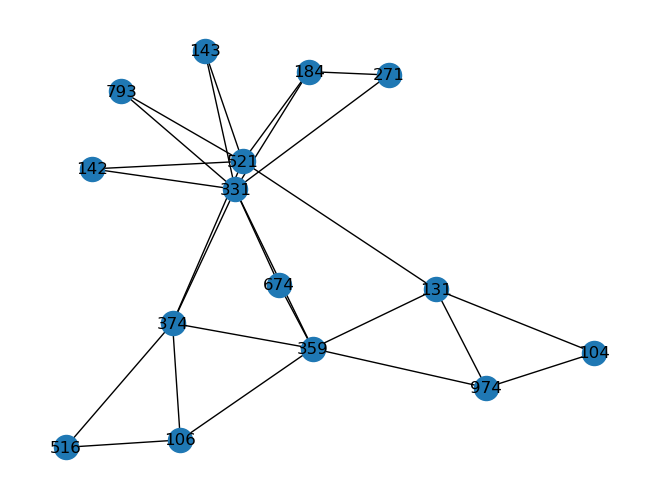

In [14]:
for idx, G in enumerate(graphs):
    if idx==1:
        nx.draw(G, with_labels=True)
        plt.show()
        break
    

In [57]:
formatted_graphs ={}
for idx,G in enumerate(graphs):
    formatted_graph = {node: list(G.neighbors(node))  for node in G.nodes()}
    for node, neighbors in formatted_graph.items():
        random.shuffle(neighbors)
    difficulty = 1 if G.number_of_nodes() >= 20 else 0
    formatted_graphs[idx] = {'graph':formatted_graph, 'difficulty':difficulty}


In [71]:
with open("../data/BA_model/BA_model_all_graphs",'w') as json_file:
    json.dump(formatted_graphs, json_file)

In [1]:
formatted_graphs

NameError: name 'formatted_graphs' is not defined

In [31]:
for idx, G in enumerate(graphs):
    # Create a plot of the graph
    plt.figure(figsize=(6, 6))
    pos = nx.spring_layout(G)  # You can change the layout if needed
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=500, font_size=10)
    plt.title(f'Graph {idx}')
    plt.savefig(f'{image_folder}/graph_{idx}.png')
    plt.close()

In [ ]:
{
	"name": "TypeError",
	"message": "expected str, bytes or os.PathLike object, not TextIOWrapper",
	"stack": "---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
/Users/sambhav_khurana/Desktop/LLM4Graph/data_scripts/BA_model.ipynb Cell 14 line 1
----> <a href='vscode-notebook-cell:/Users/sambhav_khurana/Desktop/LLM4Graph/data_scripts/BA_model.ipynb#X26sZmlsZQ%3D%3D?line=0'>1</a> with open(json_file,'w') as json_file:
      <a href='vscode-notebook-cell:/Users/sambhav_khurana/Desktop/LLM4Graph/data_scripts/BA_model.ipynb#X26sZmlsZQ%3D%3D?line=1'>2</a>     json.dump(formatted_graphs, json_file)

File ~/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py:286, in _modified_open(file, *args, **kwargs)
    279 if file in {0, 1, 2}:
    280     raise ValueError(
    281         f\"IPython won't let you open fd={file} by default \"
    282         \"as it is likely to crash IPython. If you know what you are doing, \"
    283         \"you can use builtins' open.\"
    284     )
--> 286 return io_open(file, *args, **kwargs)

TypeError: expected str, bytes or os.PathLike object, not TextIOWrapper"
}

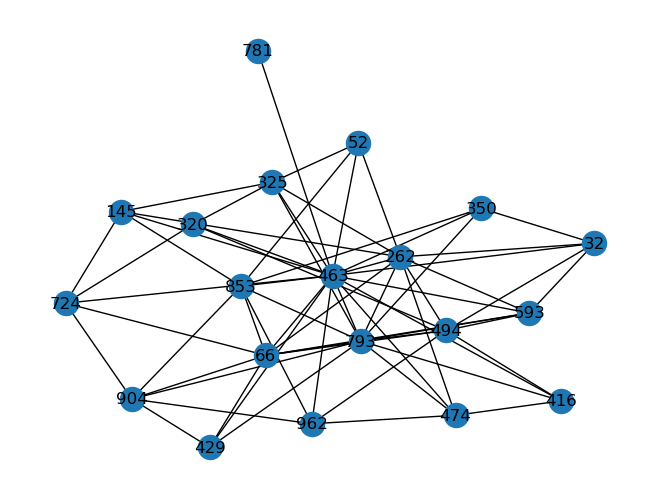

In [51]:
idx=56
nx.draw(graphs[idx], with_labels=True)
plt.show()


In [56]:
print(formatted_graphs[idx]['graph'].edges() ) 

AttributeError: 'dict' object has no attribute 'edges'

In [ ]:
{463: [66, 429, 853, 350, 262, 52, 32, 593, 416, 145, 325, 724, 962, 474, 320, 793, 781], 853: [463, 66, 52, 962, 350, 904, 793, 145], 474: [416, 463, 262, 962, 793], 325: [793, 262, 463, 320, 52, 145], 781: [463], 793: [463, 429, 494, 262, 853, 66, 593, 416, 350, 474, 904, 325], 262: [66, 145, 463, 52, 494, 474, 325, 593, 32, 793], 66: [429, 724, 904, 463, 853, 793, 593, 494, 262], 593: [32, 793, 262, 66, 463, 494], 145: [262, 724, 325, 853, 463], 494: [32, 593, 320, 66, 416, 962, 793, 262], 32: [463, 262, 593, 350, 494], 962: [474, 463, 904, 494, 853], 904: [66, 793, 724, 962, 853, 429], 724: [145, 66, 320, 463, 904], 52: [853, 463, 262, 325], 416: [494, 463, 474, 793], 429: [463, 793, 66, 904], 320: [494, 724, 463, 325], 350: [793, 32, 853, 463]}
